In [ ]:
## This python file is just for experimenting with the code. 


In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
features, true_labels = make_blobs(
    n_samples=200, 
    centers=3, 
    cluster_std=2.75, 
    random_state=42 #to avoid the randomness of the initialization
)



In [3]:
# All features need to use the same scale to consider them equally. So we need to apply feature scaling in the preprocessing step. 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [4]:
# Taking a look at the now scaled features
scaled_features[:10]


array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446],
       [-0.6091802 , -0.96748146],
       [-0.27382069,  1.20384743],
       [-1.23815784, -1.11763029],
       [ 1.0309618 ,  1.14757573],
       [-0.57532971, -0.95983806]])

In [5]:
# Applying tthe k-means algorithm

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42 #remove this for full randomness
)

In [6]:
# Now, we fit it to the data in the scaled_features

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [7]:
# we can now call the statistics with the lowest SSE as attributes of kmeans after calling .fit()

kmeans.inertia_ 

# final locations of the centroid
kmeans.cluster_centers_ 

# number of iterations required to converge
kmeans.n_iter_

2

In [8]:
# retrieving the cluster assignments as one-dimensional NumPY array

kmeans.labels_[:10]

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1])

In [9]:
# selecting the appropriate numbers of clusters with the elbow method and silhouette coefficient
# iterating through a dictionary in python

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A List holds the SSE values for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

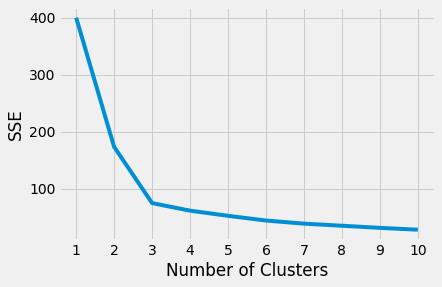

In [10]:
# Plotting the SSE curve and trying to find the elbow curve. This is where the SSE curve starts to bend down. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
# Using kneed to better find the elbow point

kl = KneeLocator(
    range(1,11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [12]:
# calculating the silhouette coefficients for each k

# This holds the silhouette coefficients for each k
silhouette_coefficients = []

# you start with at least two clusters
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   score= silhouette_score(scaled_features, kmeans.labels_)
   silhouette_coefficients.append(score)


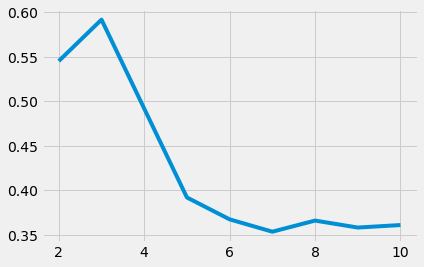

In [13]:
# Plotting the silhouette score for each k shows that the best choice for k is 3 since it has the maximum score
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)


In [14]:
# Evaluating the clustering algorithm 

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons #generates synthetic data in the shape of crescents
from sklearn.metrics import adjusted_rand_score #

In [15]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42

)

scaled_features = scaler.fit_transform(features)

In [16]:
# Fitting a k-means and DBSCAN algorithm to the new data and visually assessing the performance by plotting the cluster assignmnents

# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette score for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)

In [18]:
kmeans_silhouette
dbscan_silhouette

0.38

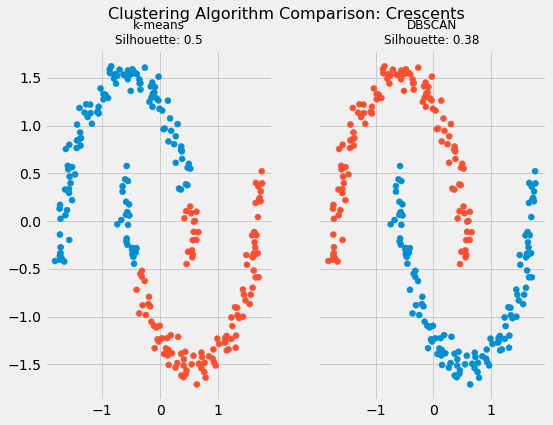

In [19]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

## Building my own clustering pipeline